# Loan Prediction Dataset

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/SoumyaManocharya/Personal-Loan-Prediction/main/Bank_Personal_Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Observation:

There are totally 15 features with 5000 entries in the given dataset.

In [3]:
#checking for null values
data.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
#checking the column indexes
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
#descriptive analysis of the data
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
#dropping the unnecessary columns
data.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [7]:
#unique values present in the personal loan category
loan = np.unique(data['Personal Loan'], return_counts=True)
loan

(array([0, 1], dtype=int64), array([4520,  480], dtype=int64))

In [8]:
# font dictionary for plotting diagrams
axhead_dic = {'family':'sherif','color':'darkred', 'weight':'bold', 'size':16}
axtitle_dic = {'family':'sherif', 'color':'darkred', 'weight':'bold', 'size':12}

findfont: Font family ['sherif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sherif'] not found. Falling back to DejaVu Sans.


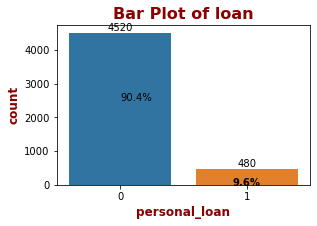

In [9]:
#barplot of loan
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1)
sns.barplot(x=loan[0], y=loan[1], ax=ax1)
ax1.text(0, 2500,'{}%'.format(str(round(loan[1][0]/sum(loan[1])*100, 2)), ha='center', va='center', size=10, fontdict={'weight':'bold'}))
ax1.text(1, 50, '{}%'.format(str(round(loan[1][1]/sum(loan[1])*100, 2))), ha='center', va='center', size=10, fontdict={'weight':'bold'})
ax1.set_title('Bar Plot of loan', fontdict=axhead_dic)
ax1.set_xlabel('personal_loan', fontdict=axtitle_dic)
ax1.set_ylabel('count', fontdict=axtitle_dic)
ax1.bar_label(ax1.containers[0])
plt.show()

In [10]:
#splitting numerical and categorical columns
categorical_features = []
for feature in data.columns:
    if data[feature].nunique()<10:
        if feature!= 'Personal Loan':
            categorical_features.append(feature)

In [11]:
#categorical features
categorical_features

['Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [12]:
#splitting numerical features from categorical features
numerical_features = []
for feature in data.columns:
    if feature not in categorical_features+['Personal Loan']:
        numerical_features.append(feature)

In [13]:
#numerical features
numerical_features

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [14]:
#unique categories of family feature
fame = np.unique(data['Family'], return_counts=True)
fame

(array([1, 2, 3, 4], dtype=int64),
 array([1472, 1296, 1010, 1222], dtype=int64))

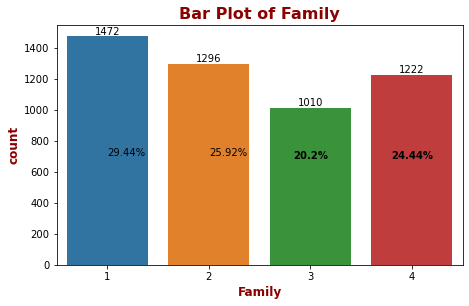

In [15]:
#barplot of family
fig = plt.figure(figsize=(16,15))
ax2 = fig.add_subplot(3,2,2)
sns.barplot(x=fame[0], y=fame[1], ax=ax2)
ax2.text(0, 700,'{}%'.format(str(round(fame[1][0]/sum(fame[1])*100, 2)),fontdict={'weight':'bold'}, ha='center', va='center'))
ax2.text(1, 700, '{}%'.format(str(round(fame[1][1]/sum(fame[1])*100, 2)), fontdict={'weight':'bold'}, ha='center', va='center'))
ax2.text(2, 700, '{}%'.format(str(round(fame[1][2]/sum(fame[1])*100, 2))), fontdict={'weight':'bold'}, ha='center', va='center')
ax2.text(3, 700, '{}%'.format(str(round(fame[1][3]/sum(fame[1])*100, 2))), fontdict={'weight':'bold'}, ha='center', va='center')
ax2.bar_label(ax2.containers[0])
ax2.set_title('Bar Plot of Family', fontdict=axhead_dic)
ax2.set_xlabel('Family', fontdict=axtitle_dic)
ax2.set_ylabel('count', fontdict=axtitle_dic)
plt.show()

In [16]:
#unique category of online feature
on = np.unique(data.Online, return_counts=True)
on

(array([0, 1], dtype=int64), array([2016, 2984], dtype=int64))

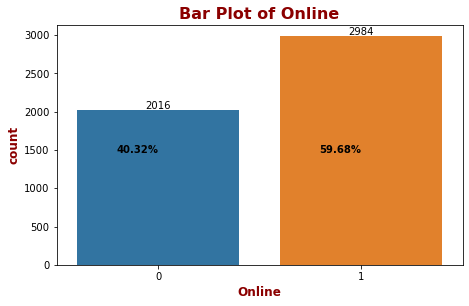

In [17]:
#barplot of online feature
fig = plt.figure(figsize=(16,15))
ax3 = fig.add_subplot(3,2,2)
sns.barplot(x=on[0], y=on[1], ax=ax3)
ax3.text(0, 1500,'{}%'.format(str(round(on[1][0]/sum(on[1])*100, 2))), ha='right', va='center', fontdict={'weight':'bold'})
ax3.text(1, 1500,'{}%'.format(str(round(on[1][1]/sum(on[1])*100, 2))), ha='right', va='center', fontdict={'weight':'bold'})
ax3.bar_label(ax3.containers[0])
ax3.set_title('Bar Plot of Online', fontdict=axhead_dic)
ax3.set_xlabel('Online', fontdict=axtitle_dic)
ax3.set_ylabel('count', fontdict=axtitle_dic)
plt.show()

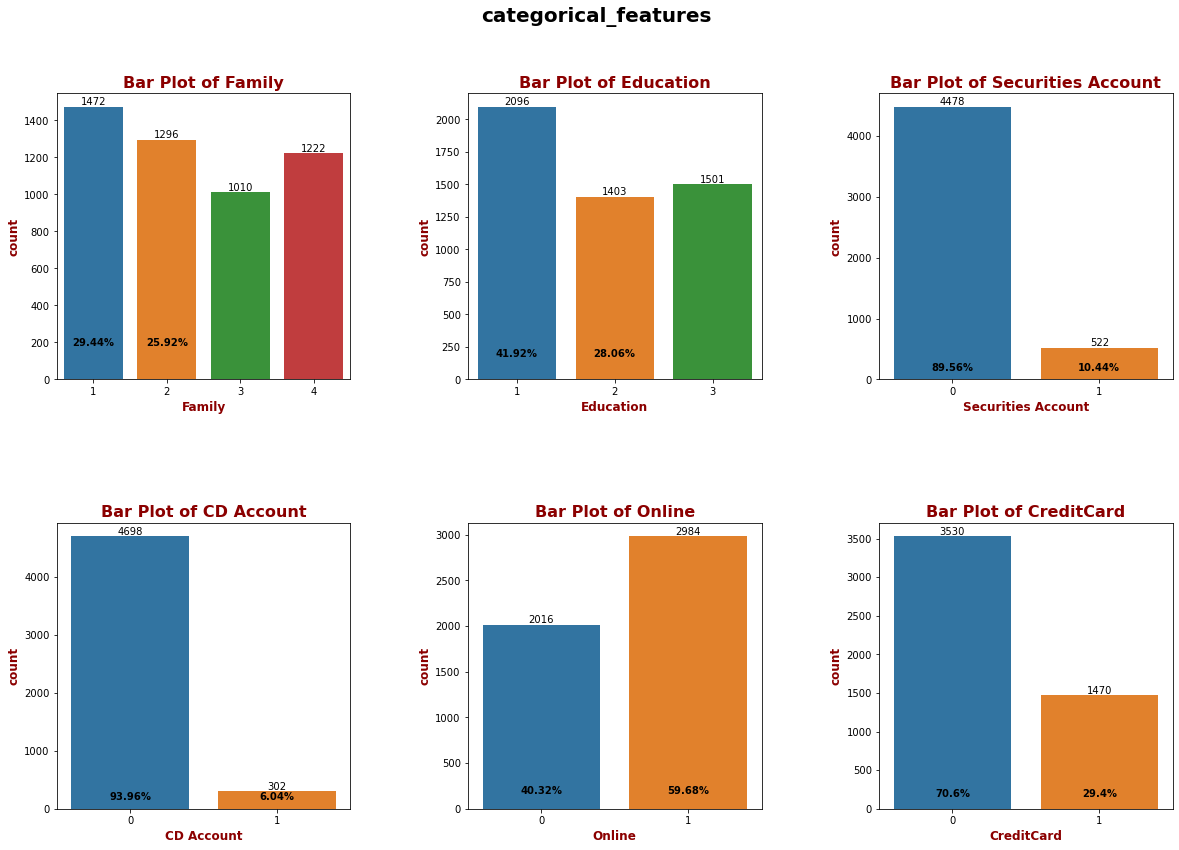

In [18]:
#barplot of all the categorical features
plt.figure(figsize=(20,20))
plt.suptitle('categorical_features', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.92)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range (len(categorical_features)):
    plt.subplot(3,3,i+1)
    index = np.unique(data[categorical_features[i]], return_counts=True)
    ax = sns.barplot(x=index[0], y=index[1])
    ax.text(0, 200, '{}%'.format(str(round(index[1][0]/sum(index[1])*100, 2))), va='center', ha='center', fontdict={'weight':'bold'})
    ax.text(1, 200, '{}%'.format(str(round(index[1][1]/sum(index[1])*100, 2))), va='center', ha='center', fontdict={'weight':'bold'})
    ax.bar_label(ax.containers[0])
    ax.set_title('Bar Plot of {}'.format(categorical_features[i]), fontdict=axhead_dic)
    ax.set_xlabel('{}'.format(categorical_features[i]), fontdict=axtitle_dic)
    ax.set_ylabel('count', fontdict=axtitle_dic)

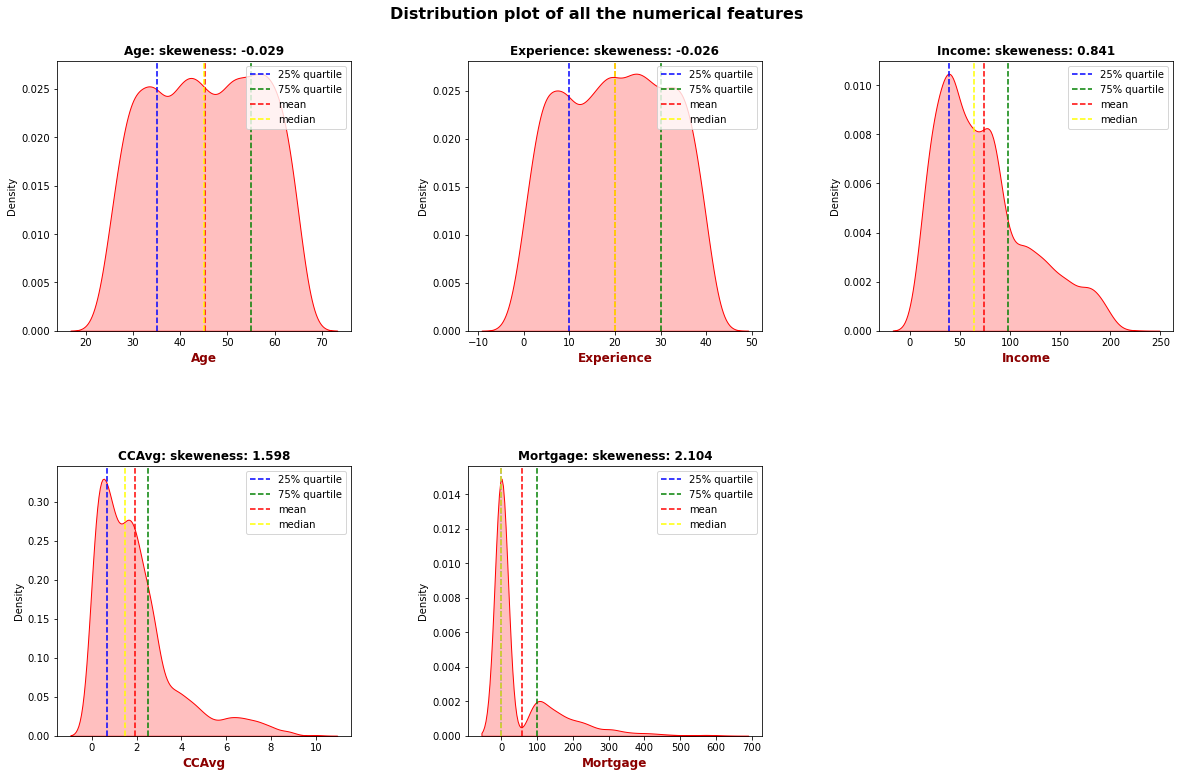

In [19]:
#distribution plot of numerical features
plt.figure(figsize=(20,25))
plt.suptitle('Distribution plot of all the numerical features', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(len(numerical_features)):
    ax = plt.subplot(4,3, i+1)
    ax = sns.kdeplot(data[numerical_features[i]], shade=True, color='red')
    ax.axvline(data[numerical_features[i]].quantile(0.25), label='25% quartile', color='blue', linestyle='--')
    ax.axvline(data[numerical_features[i]].quantile(0.75), label='75% quartile', color='green', linestyle='--')
    ax.axvline(data[numerical_features[i]].mean(), label='mean', color='red', linestyle='--')
    ax.axvline(data[numerical_features[i]].median(), label='median', color='yellow', linestyle='--')
    ax.set_title(f'{numerical_features[i]}: '  'skeweness: {}'.format(round(data[numerical_features[i]].skew(),3)), fontweight='bold')
    ax.set_xlabel('{}'.format(numerical_features[i]), fontdict=axtitle_dic)
    ax.legend(fontsize=10)

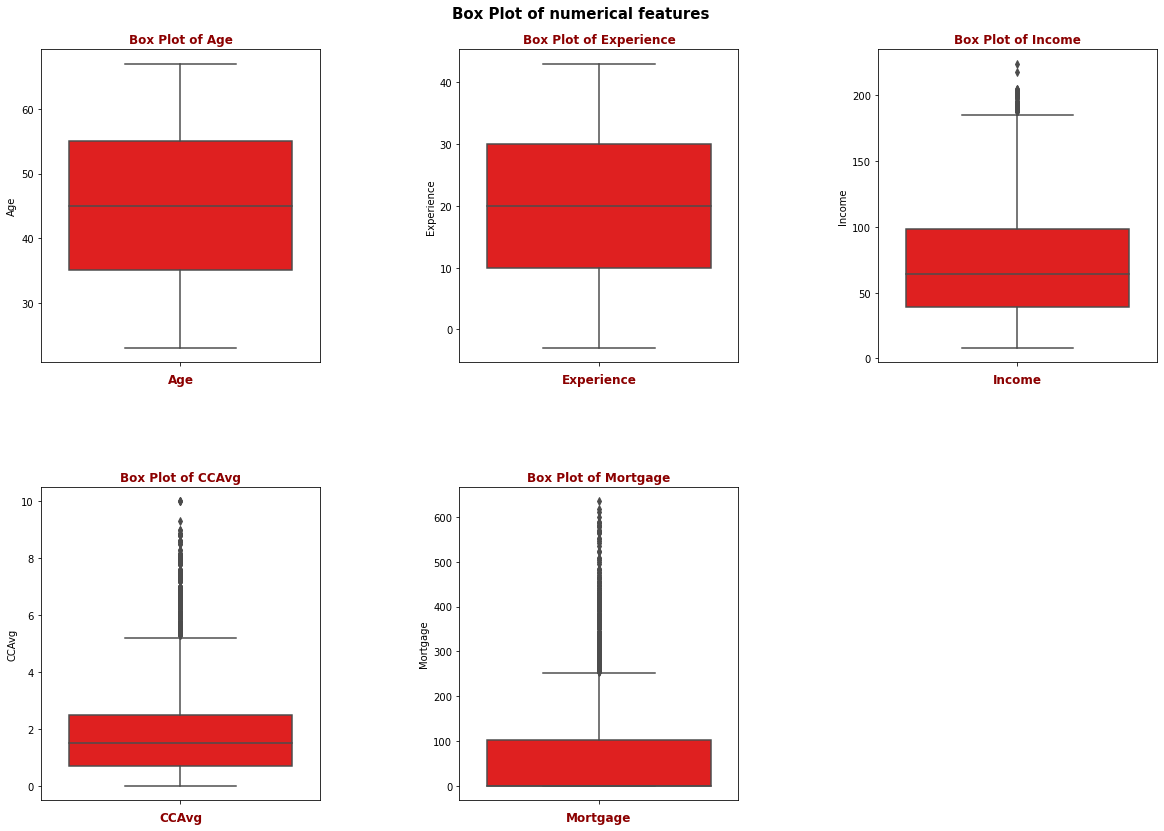

In [20]:
#box plot to visualize the outliers present in the numerical features
plt.figure(figsize=(20,20))
plt.suptitle('Box Plot of numerical features', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(numerical_features)):
    ax = plt.subplot(3,3, i+1)
    ax = sns.boxplot(y=data[numerical_features[i]], color='red')
    ax.set_title('Box Plot of {}'.format(numerical_features[i]), fontdict=axtitle_dic)
    ax.set_xlabel(numerical_features[i], fontdict=axtitle_dic)

# Observation

There are lots of outliers present in the upper sides of the features income, ccavg, mortgage.
lets remove the extreme outliers.

# Outlier Detection

In [21]:
dict = {}
for feature in ['Income', 'CCAvg', 'Mortgage']:
    upper_quartile = data[feature].quantile(0.75)
    lower_quartile = data[feature].quantile(0.25)
    inter_quartile = upper_quartile-lower_quartile
    upper_boundary = upper_quartile + (1.5*inter_quartile)
    lower_boundary = lower_quartile - (1.5*inter_quartile)
    dict['upper_boundary'+'-'+feature]=upper_boundary
    dict['lower_boundary'+'-'+feature]=lower_boundary

In [22]:
dict

{'upper_boundary-Income': 186.5,
 'lower_boundary-Income': -49.5,
 'upper_boundary-CCAvg': 5.2,
 'lower_boundary-CCAvg': -2.0,
 'upper_boundary-Mortgage': 252.5,
 'lower_boundary-Mortgage': -151.5}

In [23]:
#number of outliers present in the data
for feature in ['Income', 'CCAvg', 'Mortgage']:
    print('{} feature has {} customer data less than the lower limit'.format(
feature, len(data[data[feature]<dict['lower_boundary'+'-'+feature]])))
    print('{} feature has {} customer data greater than the upper limit'.format(
feature, len(data[data[feature]>dict['upper_boundary'+'-'+feature]])))


Income feature has 0 customer data less than the lower limit
Income feature has 96 customer data greater than the upper limit
CCAvg feature has 0 customer data less than the lower limit
CCAvg feature has 324 customer data greater than the upper limit
Mortgage feature has 0 customer data less than the lower limit
Mortgage feature has 291 customer data greater than the upper limit


In [24]:
#now imputing these 3 features with tail end value
for feature in ['Income', 'CCAvg', 'Mortgage']:
    upper_quartile = data[feature].quantile(0.75)
    lower_quartile = data[feature].quantile(0.25)
    inter_quartile = upper_quartile-lower_quartile
    upper_boundary = upper_quartile + (1.5*inter_quartile)
    lower_boundary = lower_quartile - (1.5*inter_quartile)
    data.loc[data[feature]>upper_boundary, feature] = upper_boundary
    data.loc[data[feature]<lower_boundary, feature] = lower_boundary

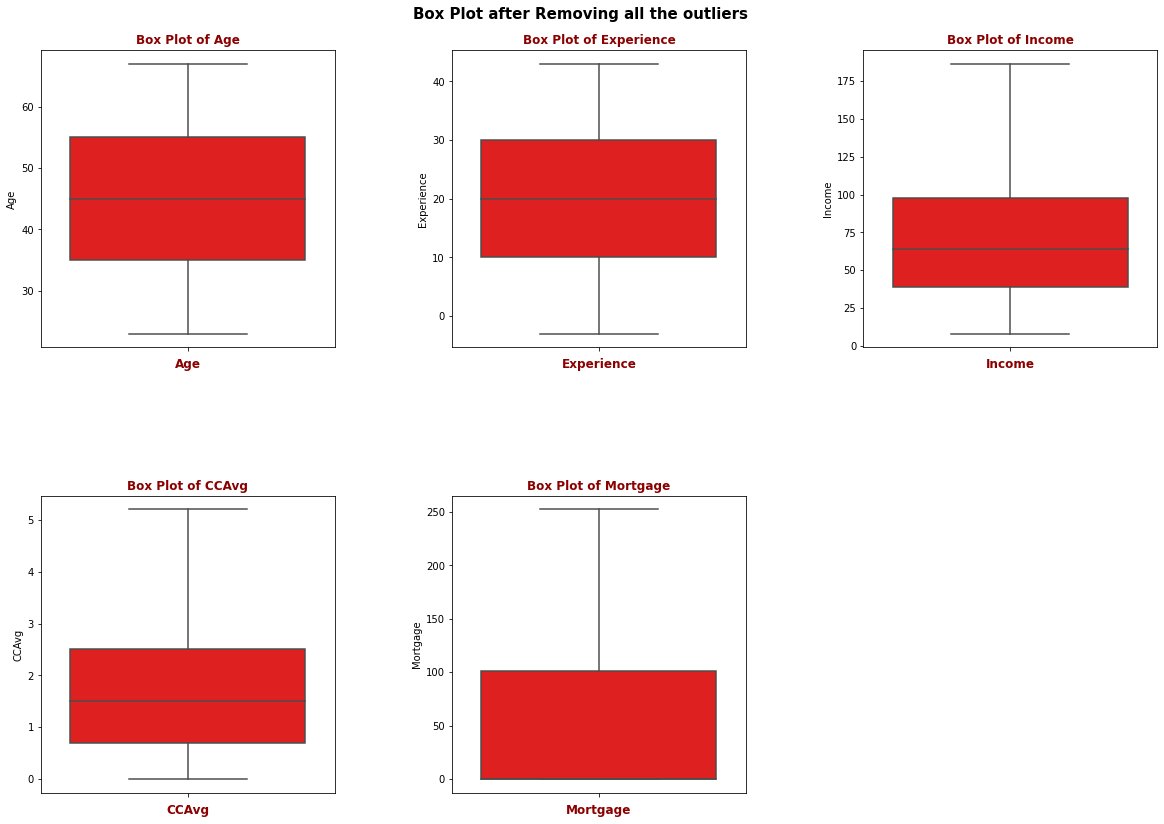

In [25]:
#plotting Box Plot after imputation
plt.figure(figsize=(20,20))
plt.suptitle('Box Plot after Removing all the outliers', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(len(numerical_features)):
    ax = plt.subplot(3,3,i+1)
    ax = sns.boxplot(y=data[numerical_features[i]], color='red')
    ax.set_title('Box Plot of {}'.format(numerical_features[i]), fontdict=axtitle_dic)
    ax.set_xlabel(numerical_features[i], fontdict=axtitle_dic)  

# Observation

There is no outliers after treatment.

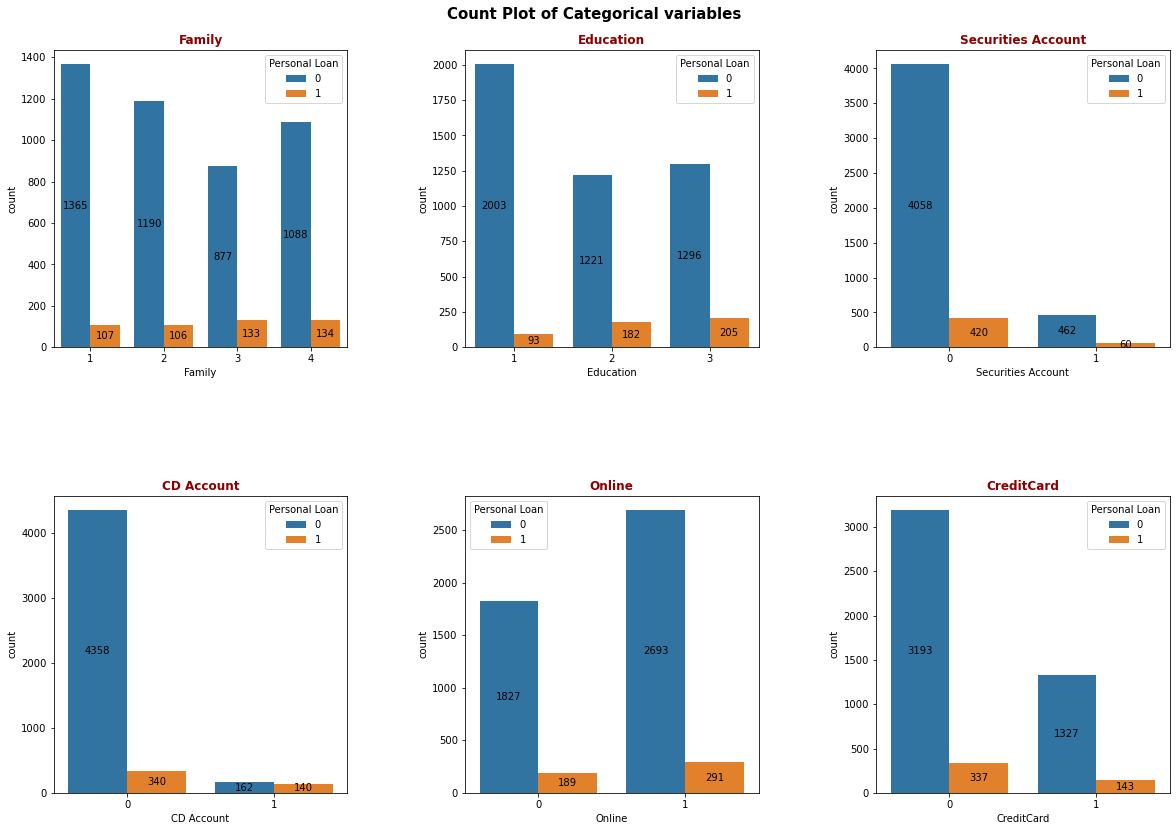

In [26]:
#count plot to see the different categorical variables
plt.figure(figsize=(20,20))
plt.suptitle('Count Plot of Categorical variables', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(len(categorical_features)):
    ax = plt.subplot(3,3, i+1)
    ax = sns.countplot(x=data[categorical_features[i]], hue=data['Personal Loan'])
    ax.set_title(categorical_features[i], fontdict=axtitle_dic)
    ax.bar_label(ax.containers[0], label_type='center')
    ax.bar_label(ax.containers[1], label_type='center')
    

# Observation

1. Highly Educated persons have more likely to take personal loan
2. customers without security are more interested in getting a loan
3. customers with internet baking has high probability of taking a personal loan
4. customers without credit card are highly likely to take a loan
5. customers with cd account has high probability of getting a loan

# Bi Variate Analysis

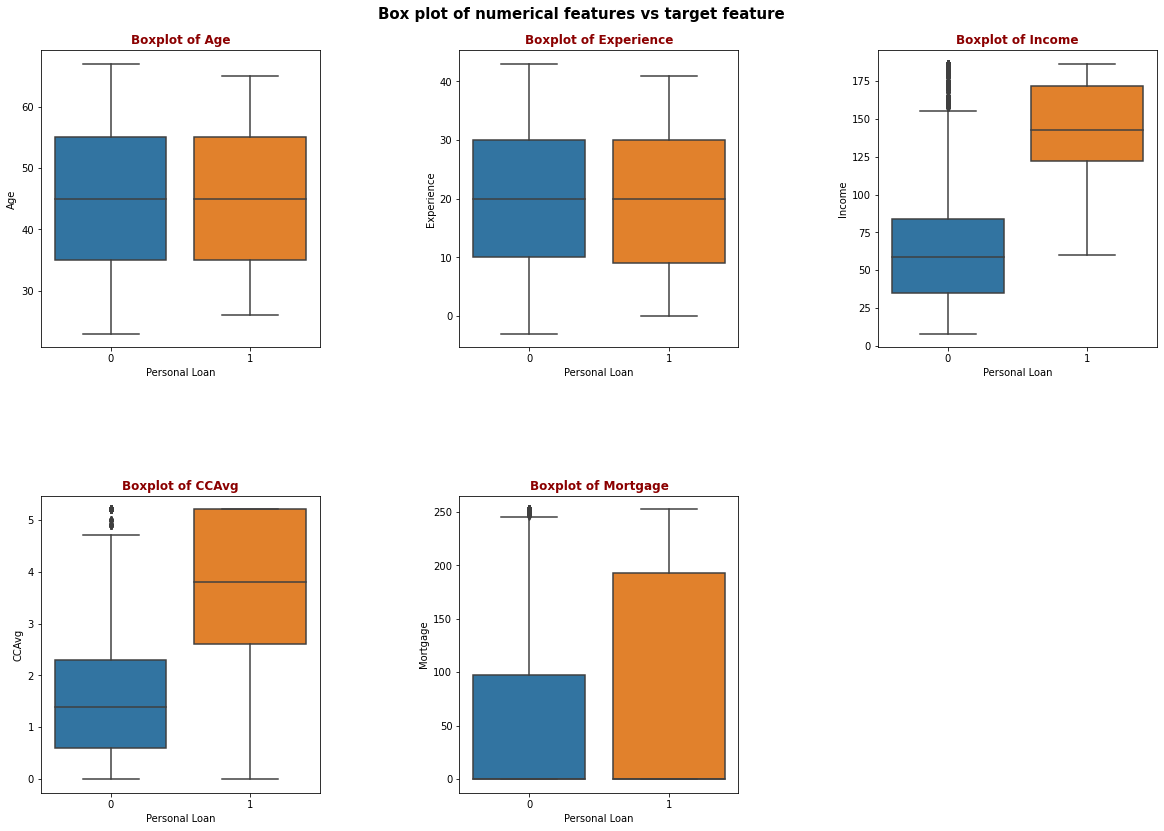

In [27]:
#boxplot of numerical features vs target features
plt.figure(figsize=(20,20))
plt.suptitle('Box plot of numerical features vs target feature', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range (len(numerical_features)):
    ax = plt.subplot(3,3, i+1)
    ax = sns.boxplot(x=data['Personal Loan'], y=data[numerical_features[i]])
    ax.set_title('Boxplot of {}'.format(numerical_features[i]), fontdict=axtitle_dic)

# Observation

1. customers who have taken personal loan has high median income of around 145 than the customers with
no loan
2. customers who taken loan have high median ccavg of 4.5
3. Customers who opted for personal loan have slightly higher mortgate
4. personal loan features has no difference on age and experience

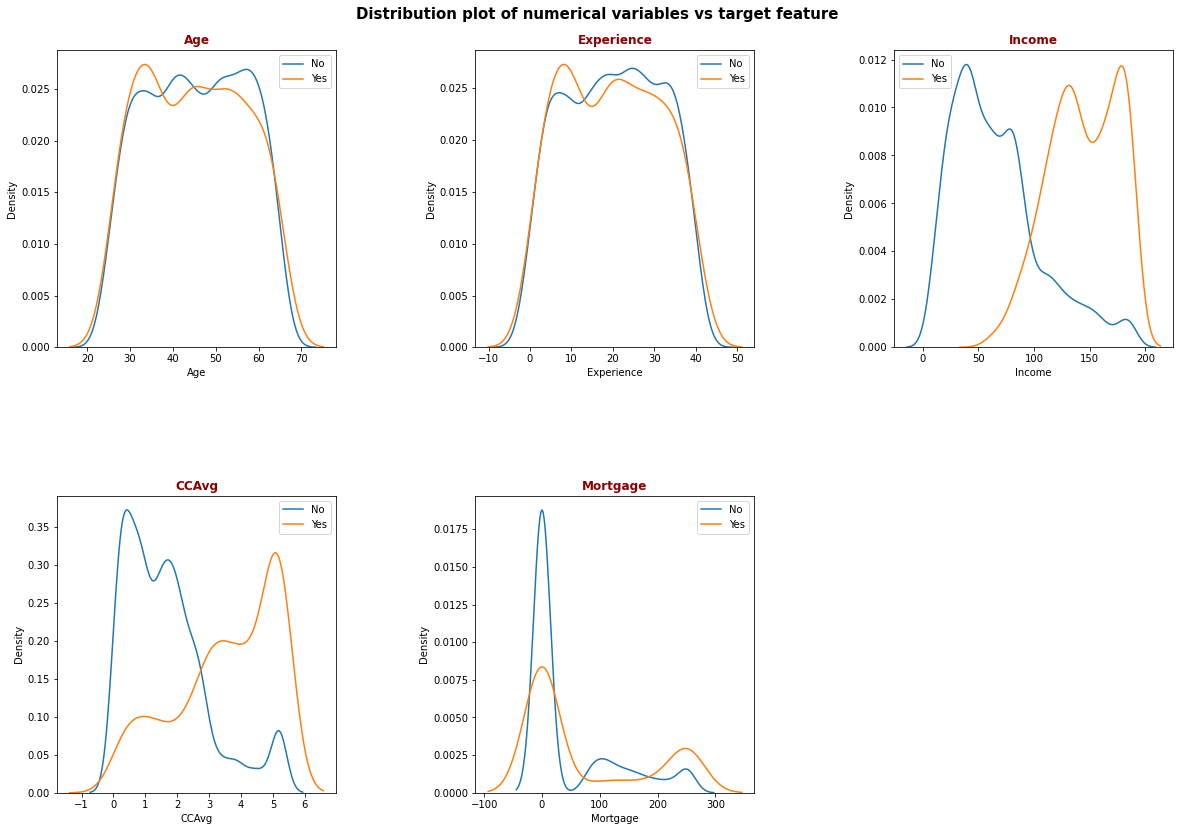

In [28]:
#kdeplot of numerical features
plt.figure(figsize=(20,20))
plt.suptitle('Distribution plot of numerical variables vs target feature', fontsize=15, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(len(numerical_features)):
    ax = plt.subplot(3,3,i+1)
    ax = sns.kdeplot(x=data[data['Personal Loan']==0][numerical_features[i]])
    ax = sns.kdeplot(x=data[data['Personal Loan']==1][numerical_features[i]])
    ax.legend(['No', 'Yes'])
    ax.set_title('{}'.format(numerical_features[i]), fontdict=axtitle_dic)

In [29]:
#creating dummy variables
dummy_data = pd.get_dummies(data, columns=categorical_features)
dummy_data

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49.0,1.6,0.0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34.0,1.5,0.0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11.0,1.0,0.0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100.0,2.7,0.0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45.0,1.0,0.0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1.9,0.0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,30,4,15.0,0.4,85.0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,63,39,24.0,0.3,0.0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,65,40,49.0,0.5,0.0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


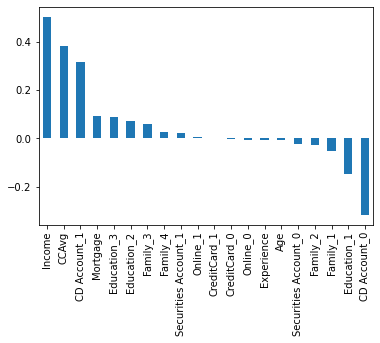

In [30]:
#corelation between the variables
ax = dummy_data.corr()['Personal Loan'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.show()

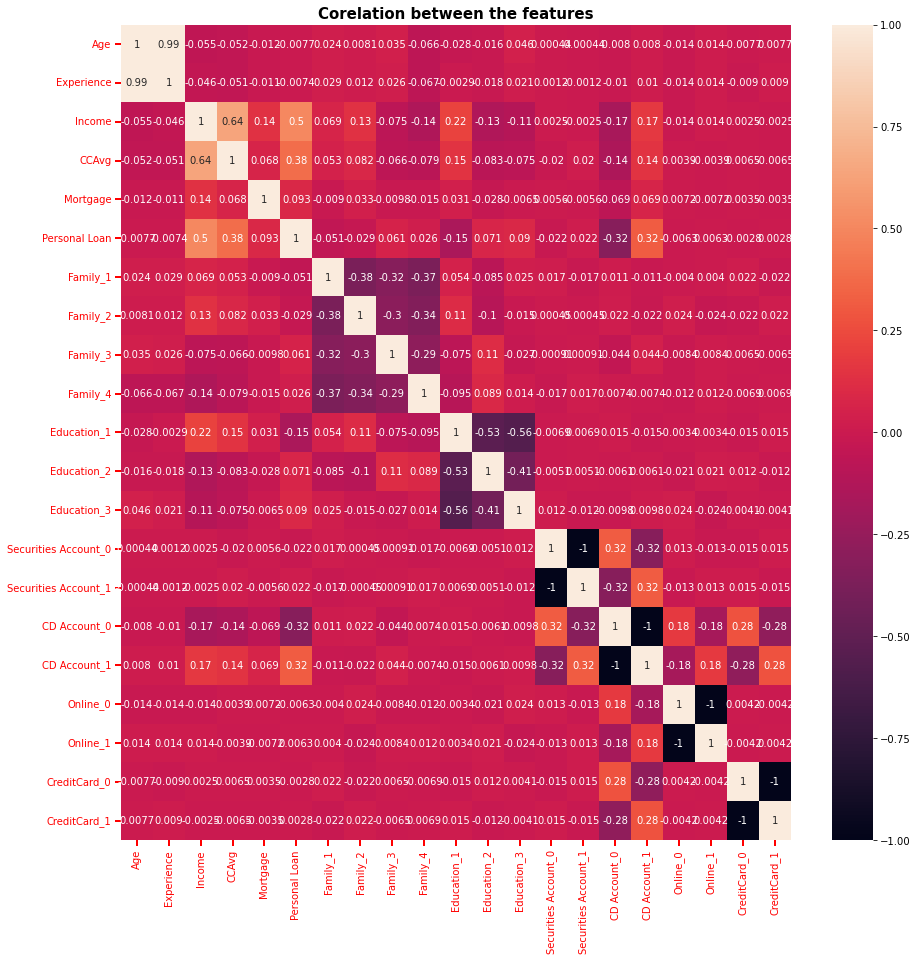

In [31]:
#visualizing the corelation using heatmap
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(dummy_data.corr(), annot=True)
ax.tick_params(direction='out', length=6, width=2, colors='r',
                   grid_color='r', grid_alpha=0.5)
ax.set_title('Corelation between the features', fontsize=15, fontweight='bold')
plt.show()

In [32]:
#extracting the features
cols = list()
for feature in dummy_data.columns:
    if feature not in ['Personal Loan']:
        cols.append(feature)

In [33]:
#extracting out the highly corelated features
co_features = set()
co_matrix = dummy_data[cols].corr()
for i in range(len(co_matrix)):
    for j in range(i):
        if abs (co_matrix.iloc[i,j])>0.85:
            col = co_matrix.columns[i]
            co_features.add(col)

In [34]:
#highly corelated features 
co_features

{'CD Account_1',
 'CreditCard_1',
 'Experience',
 'Online_1',
 'Securities Account_1'}

In [35]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = dummy_data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [36]:
compute_vif(dummy_data.columns)

,Variable,VIF
0,Age,94.266593
1,Experience,94.124798
2,Income,2.200270
3,CCAvg,1.716480
4,Mortgage,1.023869
5,Personal Loan,1.677884
6,Family_1,inf
7,Family_2,inf
8,Family_3,inf
9,Family_4,inf


In [37]:
#removing out all the highly corelated features
dummy_data.drop(co_features, axis=1, inplace=True)

In [38]:
#variation ionflation factor after removing highly corelated features 
compute_vif(dummy_data.columns)

,Variable,VIF
0,Age,1.011944
1,Income,2.198183
2,CCAvg,1.710011
3,Mortgage,1.023869
4,Personal Loan,1.675770
5,Family_1,inf
6,Family_2,inf
7,Family_3,inf
8,Family_4,inf
9,Education_1,inf


In [39]:
#columns present in the data
dummy_data.columns

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2',
       'Education_3', 'Securities Account_0', 'CD Account_0', 'Online_0',
       'CreditCard_0'],
      dtype='object')

In [40]:
#independent variables
x = dummy_data.drop('Personal Loan', axis=1)

In [41]:
#dependent feature
y = dummy_data['Personal Loan']

In [42]:
#importing train test split
from sklearn.model_selection import train_test_split

In [43]:
#train and test split of data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [44]:
#importing all the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, roc_auc_score, roc_curve, plot_confusion_matrix

In [45]:
models = []
accuracyscore = []
precisionscore = []
recallscore = []
f1score = []
def scores (x_train, x_test, y_train, y_test, y_pred, model, model_name):
    print(f'accuracy score: {round(accuracy_score(y_test, y_pred),3)}')
    print(f'precision score: {round(precision_score(y_test, y_pred),3)}')
    print(f'f1 score: {round(f1_score(y_test, y_pred), 3)}')
    print(f'recall score: {round(recall_score(y_test, y_pred), 3)}')
    print(f'Classification report:\n------------------------------------------------------------\n{classification_report(y_test, y_pred)}')
    print('Confusion Metrics Plot: \n-------------------------------------------------------------')
    plot_confusion_matrix(model, x_test, y_test, display_labels=['no personal loan', 'personal loan'])
    models.append(model_name)
    accuracyscore.append(round(accuracy_score(y_test, y_pred),3))
    precisionscore.append(round(precision_score(y_test, y_pred),3))
    recallscore.append(round(recall_score(y_test, y_pred), 3))
    f1score.append(round(f1_score(y_test, y_pred), 3))

# Logistic Regression

In [46]:
#creating an object
logistic_regression = LogisticRegression()

In [47]:
#fitting on train dataset
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [48]:
#creating object for logistic regression
logi_pred = logistic_regression.predict(x_test)

accuracy score: 0.957
precision score: 0.822
f1 score: 0.736
recall score: 0.667
Classification report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       910
           1       0.82      0.67      0.74        90

    accuracy                           0.96      1000
   macro avg       0.89      0.83      0.86      1000
weighted avg       0.95      0.96      0.95      1000

Confusion Metrics Plot: 
-------------------------------------------------------------


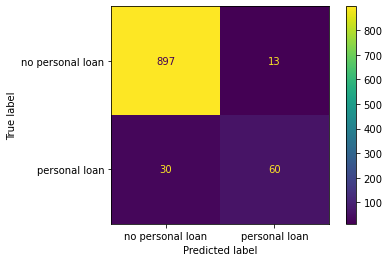

In [49]:
#calling function
scores(x_train, x_test, y_train, y_test, logi_pred, logistic_regression, 'Logistic_Regression')

# KNeighbors Classifier

In [50]:
#objcet for KNeighbour classifier
KNN = KNeighborsClassifier()

In [51]:
#fitting on training model
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [52]:
#predicting the model
Kpred = KNN.predict(x_test)

accuracy score: 0.912
precision score: 0.519
f1 score: 0.389
recall score: 0.311
Classification report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       910
           1       0.52      0.31      0.39        90

    accuracy                           0.91      1000
   macro avg       0.73      0.64      0.67      1000
weighted avg       0.90      0.91      0.90      1000

Confusion Metrics Plot: 
-------------------------------------------------------------


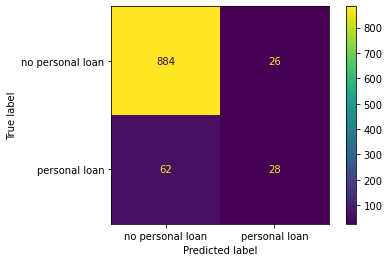

In [53]:
scores(x_train, x_test, y_train, y_test,Kpred, KNN, 'Kneighbour_classifier')

# Support Vector Classifier

In [54]:
#creating an object
svc = SVC()

In [55]:
#fitting the model
svc.fit(x_train, y_train)

SVC()

In [56]:
#predicting the model
svc_pred = svc.predict(x_test)

accuracy score: 0.915
precision score: 0.609
f1 score: 0.248
recall score: 0.156
Classification report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       910
           1       0.61      0.16      0.25        90

    accuracy                           0.92      1000
   macro avg       0.77      0.57      0.60      1000
weighted avg       0.89      0.92      0.89      1000

Confusion Metrics Plot: 
-------------------------------------------------------------


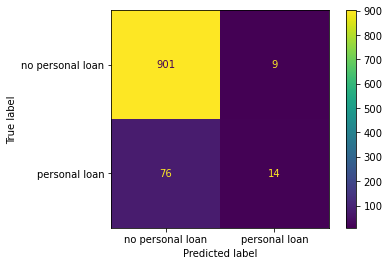

In [57]:
scores(x_train, x_test, y_train, y_test, svc_pred, svc, 'Support_Vector_Classifier')

# Random Forest Classifier

In [58]:
#creating an object for random forest classifier
random = RandomForestClassifier()

In [59]:
#fitting the model on training datasset
random.fit(x_train, y_train)

RandomForestClassifier()

In [60]:
#predicting the model
random_pred = random.predict(x_test)

accuracy score: 0.99
precision score: 1.0
f1 score: 0.941
recall score: 0.889
Classification report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       1.00      0.89      0.94        90

    accuracy                           0.99      1000
   macro avg       0.99      0.94      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Metrics Plot: 
-------------------------------------------------------------


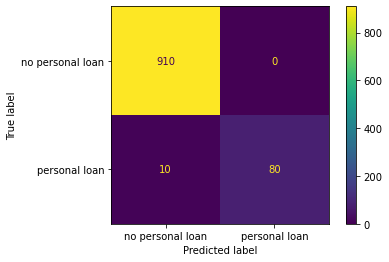

In [61]:
scores(x_train, x_test, y_train, y_test, random_pred, random, 'RandoM_Forset_Classifier')

# Decision Tree Classifier

In [62]:
dec = DecisionTreeClassifier()

In [63]:
dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
dec_pred = dec.predict(x_test)

accuracy score: 0.982
precision score: 0.929
f1 score: 0.897
recall score: 0.867
Classification report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.93      0.87      0.90        90

    accuracy                           0.98      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Confusion Metrics Plot: 
-------------------------------------------------------------


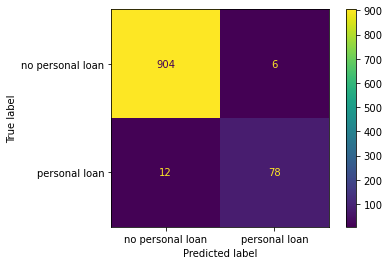

In [65]:
scores(x_train, x_test, y_train, y_test, dec_pred, dec, 'Decision_Tree_Classifier')

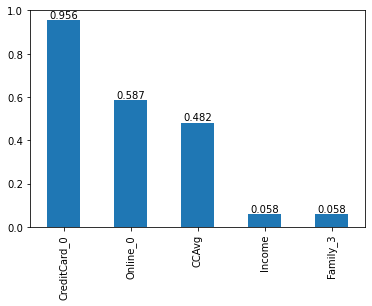

In [66]:
#top 5 variables interaction
ax = round(pd.Series((logistic_regression.coef_)[0], index=x.columns),3).sort_values(ascending=False)[:5].plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

In [67]:
dictionary = {'model':models, 'Accuracy_Score':accuracyscore, 'Precision_Score':precisionscore,
             'F1_Score':f1score, 'Recall_Score': recallscore}

In [68]:
pd.DataFrame(dictionary).sort_values(by='Accuracy_Score', ascending=False).reset_index(drop=True)

,model,Accuracy_Score,Precision_Score,F1_Score,Recall_Score
0,RandoM_Forset_Classifier,0.990,1.000,0.941,0.889
1,Decision_Tree_Classifier,0.982,0.929,0.897,0.867
2,Logistic_Regression,0.957,0.822,0.736,0.667
3,Support_Vector_Classifier,0.915,0.609,0.248,0.156
4,Kneighbour_classifier,0.912,0.519,0.389,0.311


# Random Forest Classifier gives best accuracy with a general model